In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error as mse, zero_one_loss, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
data_file_directory = "D:\MSc Data Science\Compulsory Modules\[INF-DS-C1] Machine Learning\Semester Project\Project Data"

In [3]:
path = os.path.join(data_file_directory, "Projekt 1 (Einkommen), Daten-20200807\einkommen.train" )

data = pd.read_csv(path, header = None, na_values = " ?")
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We dont know what column refers to which one. First thing we will do is to make the data beautiful to look at.
Let start it with naming the columns.
We will refer the PDF for the names of the columns.

In [4]:
columns = ["Age", "Employment type", "Interview-dependent", "Education level", "Schooling/training period", "Marital Status",
          "Employment area", "Partnership", "Ethnicity", "Gender", "Gains", "Losses", "Working time(Weekly)", "Country", 
           "Income"]
data.columns=columns
data.head()

,Age,Employment type,Interview-dependent,Education level,Schooling/training period,Marital Status,Employment area,Partnership,Ethnicity,Gender,Gains,Losses,Working time(Weekly),Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Lets's preprocess each column one by one.

## Income

In [5]:
# Let's check if there is any null/empty values in income attribute.
data.iloc[0:5000]["Income"].isnull().sum()

0

In [6]:
# First 5000 values will be our training data, and the rest 25000 will be test data, which have the value of nan.
data["Income"].unique()

array([' <=50K', ' >50K', nan], dtype=object)

In [7]:
data["Income"] = data["Income"].astype("category")  # Converting the Income to type "Category"
data["Income cat"] = data["Income"].cat.codes       # We will drop the "Income" attribute at the end, after done some analysis.

In [8]:
# To check which class corresponds to which class.
Income_mapping_dict = dict( enumerate(data['Income'].cat.categories ) )
Income_mapping_dict

{0: ' <=50K', 1: ' >50K'}

In [9]:
#data.drop( "Income", axis = 1, inplace = True)

### Age

In [10]:
print("Some information about Age:")
print("Unique values in Age: ", data["Age"].unique())
print("Total number of Unique values in Age: ", len(data["Age"].unique()))
print("Total number of null values in Age: ", data["Age"].isnull().sum())

Some information about Age:
Unique values in Age:  [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86]
Total number of Unique values in Age:  72
Total number of null values in Age:  0


We can see that most of the age group is in the range of 20-50 years of age. And there is no null values in Age column.

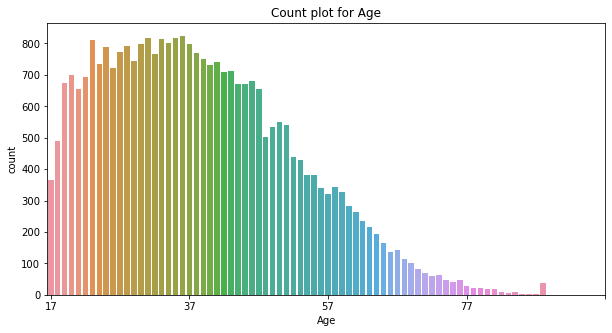

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data["Age"])
plt.title("Count plot for Age")
plt.xticks([0, 20, 40, 60, 80])
plt.show()

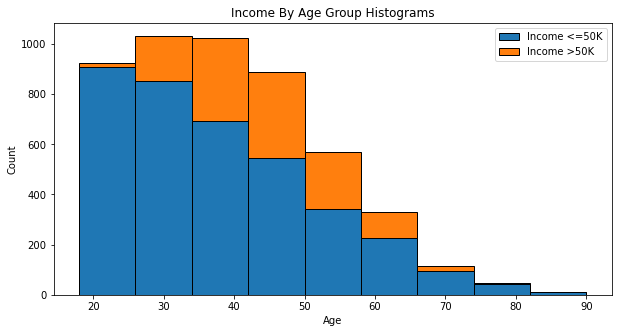

In [12]:
# Histogram of Age segmented by Income.
fig, ax = plt.subplots(1,1,figsize=(10, 5))

#ax = fig.add_subplot(111)
bin_size = 10
data_less    = data[data['Income'] == Income_mapping_dict[0]]['Age'][:5000]
data_greater = data[data['Income'] == Income_mapping_dict[1]]['Age'][:5000]
max_age = max(data['Age'])
bins = (int)(max_age/bin_size)

ax.hist([data_less, data_greater],edgecolor='black', range = (18, max_age), bins=bins, stacked = True)
ax.legend(('Income <=50K','Income >50K'),loc='best')
ax.set_title('Income By Age Group Histograms')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.show()

### Employment type

In [13]:
# Lets check for null values.
data["Employment type"].isnull().sum()

1677

In [14]:
# Employment type
data["Employment type"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

We need to preprocess nan values before feeding them into machine learning model.

In [15]:
data["Employment type"].value_counts()

 Private             20901
 Self-emp-not-inc     2363
 Local-gov            1928
 State-gov            1189
 Self-emp-inc         1037
 Federal-gov           887
 Without-pay            13
 Never-worked            5
Name: Employment type, dtype: int64

In [16]:
emp_ct = pd.crosstab(data['Employment type'][:5000], data['Income'][:5000])
emp_ct

Income,<=50K,>50K
Employment type,,
Federal-gov,94,52
Local-gov,252,77
Private,2650,785
Self-emp-inc,71,111
Self-emp-not-inc,279,104
State-gov,134,59
Without-pay,1,0


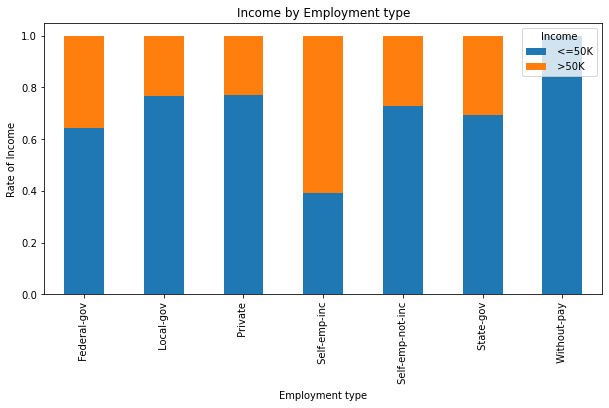

In [17]:
# Normalizing cross tab to sum to 1, else the values was way too big to analyse the plot.
emp_ct = emp_ct.div(emp_ct.sum(1).astype(float), axis=0)  
emp_ct.plot(kind='bar', stacked=True,  title="Income by Employment type", figsize=(10,5))
plt.xlabel("Employment type")
plt.ylabel("Rate of Income")
plt.show()

Note: We cannot see "Never-worked" value in the above bar graph. Let's analyse what is happening there.

In [18]:
data.index[data["Employment type"] == " Never-worked"]

Int64Index([5361, 10845, 14772, 20337, 23232], dtype='int64')

So, we can see here that "Never-worked" value is not in the trainign data, it is just present in test data, from 
index 5000 onwards. SO we will simply delete these instances from the data frame.

In [19]:
data.drop(index = data.index[data["Employment type"] == " Never-worked"], inplace=True)

We could have process these nan values as classification task, taking all the attributes without null values
as training data, and use that model to predict the classes for "Employment type", but this wouldnt be much
accurate as the classes with these are very imbalance. So, it would be better if we go for mode or median for 
the remaining nan values.

In [20]:
# Taking the mode of not null values.
data["Employment type"].fillna( data["Employment type"].value_counts().idxmax(), inplace=True)

In [21]:
# Lets use one hot encoding
data = pd.get_dummies(data, columns=["Employment type"])
# And the column "Emploment type" column just drop by itself.

## Interview dependent

In [22]:
# check for null value
data["Interview-dependent"].isnull().sum()

0

In [23]:
data["Interview-dependent"].max()

1484705

In [24]:
data["Interview-dependent"].min()

12285

The minimum value is 12285 and maximum value is 1484705. The maximum and minimum value is very far away from eah other, 
and we need it be on close range. Hence, we will use z score for normalization.

## Education level

In [25]:
# Check for null values.
data["Education level"].isnull().sum()

0

In [26]:
data["Education level"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

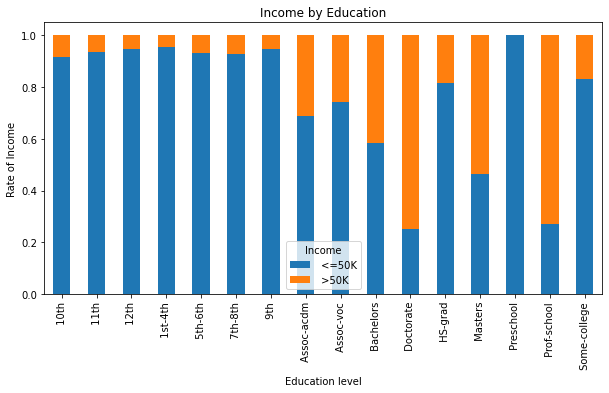

In [27]:
edu_ct = pd.crosstab(data['Education level'][:5000], data['Income'][:5000])
edu_ct = edu_ct.div(edu_ct.sum(1).astype(float), axis=0)  
edu_ct.plot(kind='bar', stacked=True,  title="Income by Education", figsize=(10, 5))
plt.xlabel("Education level")
plt.ylabel("Rate of Income")
plt.show()

In [28]:
# convert this column into one hot encoding.
data = pd.get_dummies(data, columns=["Education level"])

## Schooling/training period

In [29]:
data["Schooling/training period"].isnull().sum()

0

In [30]:
data["Schooling/training period"].unique() # These are not categorical values, these are numbers in years.

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

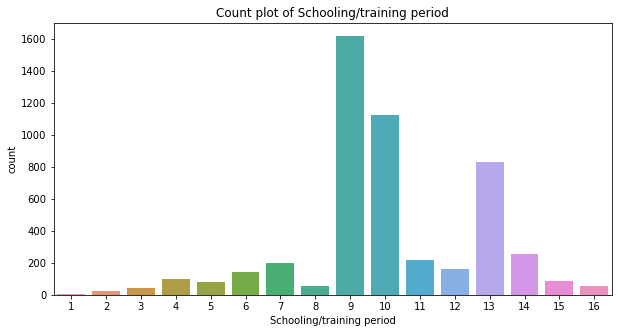

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(data["Schooling/training period"][:5000]) # Only for training data
plt.title("Count plot of Schooling/training period")
plt.show()

## Marital Status

In [32]:
data["Marital Status"].isnull().sum()

0

In [33]:
data["Marital Status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

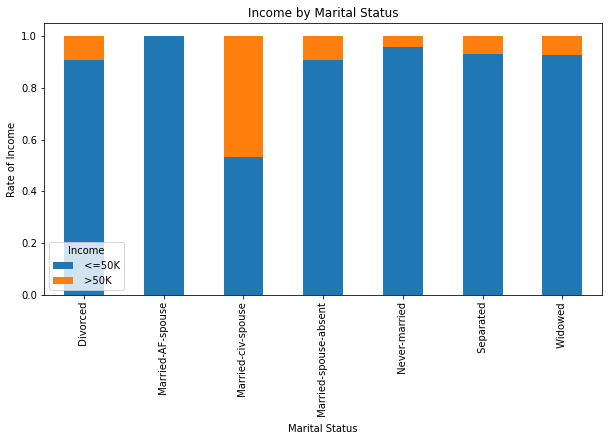

In [34]:
marital_ct = pd.crosstab(data["Marital Status"][:5000], data["Income"][:5000])
marital_ct = marital_ct.div(marital_ct.sum(1).astype(float), axis=0)  
marital_ct.plot(kind='bar', stacked=True,  title="Income by Marital Status", figsize=(10, 5))
plt.xlabel("Marital Status")
plt.ylabel("Rate of Income")
plt.show()

In [35]:
data = pd.get_dummies(data, columns=["Marital Status"])

## Employment Area

In [36]:
data["Employment area"].isnull().sum()

1677

In [37]:
data["Employment area"].value_counts()

 Prof-specialty       3802
 Craft-repair         3784
 Exec-managerial      3736
 Adm-clerical         3507
 Sales                3370
 Other-service        3044
 Machine-op-inspct    1846
 Transport-moving     1473
 Handlers-cleaners    1252
 Farming-fishing       913
 Tech-support          856
 Protective-serv       583
 Priv-house-serv       144
 Armed-Forces            8
Name: Employment area, dtype: int64

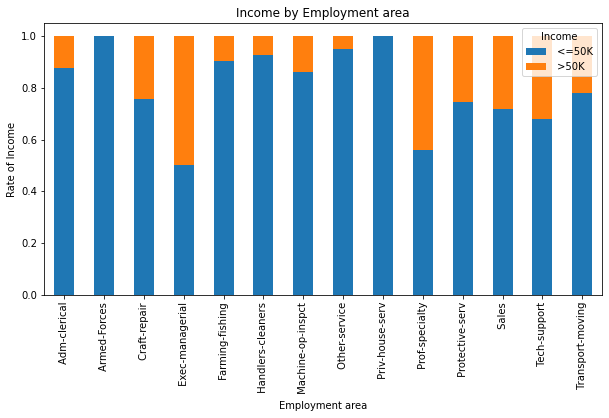

In [38]:
emp_area_ct = pd.crosstab(data["Employment area"][:5000], data['Income'][:5000])
emp_area_ct = emp_area_ct.div(emp_area_ct.sum(1).astype(float), axis=0)  
emp_area_ct.plot(kind='bar', stacked=True,  title="Income by Employment area", figsize=(10, 5))
plt.xlabel("Employment area")
plt.ylabel("Rate of Income")
plt.show()

In [39]:
data["Employment area"].fillna( data["Employment area"].value_counts().idxmax(), inplace=True)

In [40]:
# Lets use one hot encoding
data = pd.get_dummies(data, columns=["Employment area"])
# And the column "Emploment type" column would just drop by itself.

## Partnership

In [41]:
data["Partnership"].isnull().sum()

0

In [42]:
data = pd.get_dummies(data, columns=["Partnership"])

## Ethnicity

In [43]:
data["Ethnicity"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

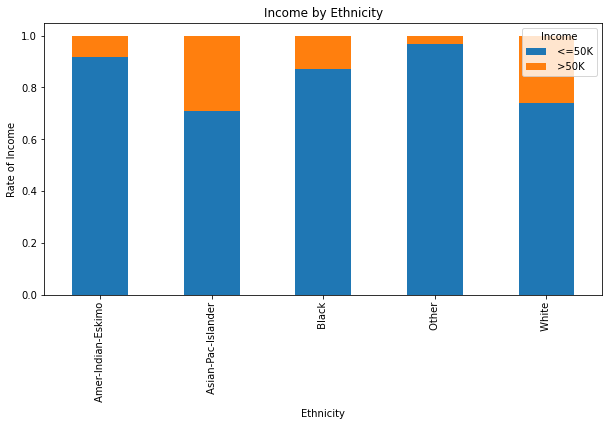

In [44]:
ethnic_ct = pd.crosstab(data["Ethnicity"][:5000], data['Income'][:5000])
ethnic_ct = ethnic_ct.div(ethnic_ct.sum(1).astype(float), axis=0)  
ethnic_ct.plot(kind='bar', stacked=True,  title='Income by Ethnicity', figsize=(10, 5))
plt.xlabel("Ethnicity")
plt.ylabel("Rate of Income")
plt.show()

In [45]:
data = pd.get_dummies(data, columns=["Ethnicity"])

## Gender

In [46]:
data["Gender"].isnull().sum()

0

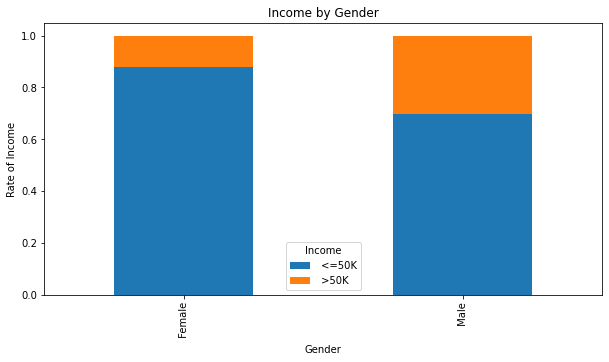

In [47]:
gender_ct = pd.crosstab(data["Gender"][:5000], data['Income'][:5000])
gender_ct = gender_ct.div(gender_ct.sum(1).astype(float), axis=0)  
gender_ct.plot(kind='bar', stacked=True,  title='Income by Gender', figsize=(10, 5))
plt.xlabel("Gender")
plt.ylabel("Rate of Income")
plt.show()

In [48]:
data = pd.get_dummies(data, columns=["Gender"])

## Gains, Losses, Working time(Weekly)	

In [49]:
data["Gains"].isnull().sum()

0

In [50]:
data["Losses"].isnull().sum()

0

In [51]:
data["Working time(Weekly)"].isnull().sum()

0

## Country

In [52]:
data["Country"][:5000].isnull().sum()

97

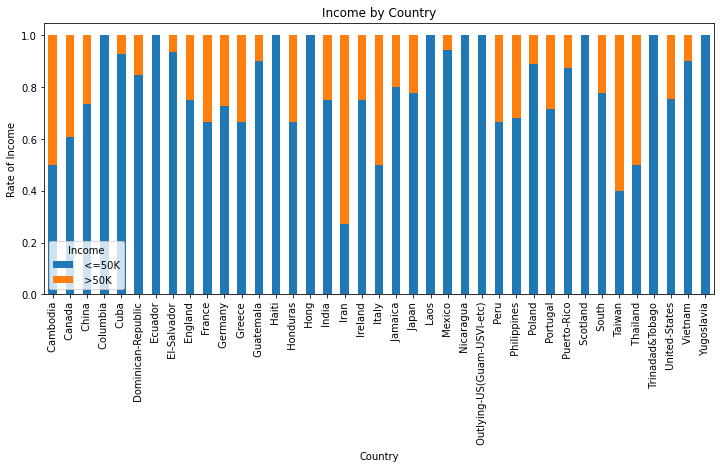

In [53]:
country_ct = pd.crosstab(data["Country"][:5000], data['Income'][:5000])
country_ct = country_ct.div(country_ct.sum(1).astype(float), axis=0)  
country_ct.plot(kind='bar', stacked=True,  title='Income by Country', figsize=(12, 5))
plt.xlabel("Country")
plt.ylabel("Rate of Income")
plt.show()

In [54]:
data["Country"].fillna( data["Country"].value_counts().idxmax(), inplace=True )

In [55]:
data = pd.get_dummies(data, columns=["Country"])

## Final preprocessing...

In [56]:
data.drop("Income", axis=1, inplace=True)

In [57]:
# z_score normalization
column_z_score = ["Age", "Interview-dependent", "Schooling/training period", "Gains", "Losses", "Working time(Weekly)"]
for i in column_z_score:
    #name_ = i + "_z_score"
    data[i] = (data[i] - data[i].mean()) / data[i].std()

In [58]:
data.head()

,Age,Interview-dependent,Schooling/training period,Gains,Losses,Working time(Weekly),Income cat,Employment type_ Federal-gov,Employment type_ Local-gov,Employment type_ Private,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,0.030359,-1.064520,1.135211,0.144902,-0.215747,-0.035208,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.836423,-1.009559,1.135211,-0.146206,-0.215747,-2.228070,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042919,0.245533,-0.420039,-0.146206,-0.215747,-0.035208,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.056259,0.426444,-1.197665,-0.146206,-0.215747,-0.035208,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.775704,1.409842,1.135211,-0.146206,-0.215747,-0.035208,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Final Data Preparation

In [59]:
def data_cleaning(path):
    #### Summary
    columns = ["Age", "Employment type", "Interview-dependent", "Education level", "Schooling/training period", "Marital Status",
              "Employment area", "Partnership", "Ethnicity", "Gender", "Gains", "Losses", "Working time(Weekly)", "Country", 
               "Income"]

    data = pd.read_csv(path, names = columns, na_values = " ?")

    ### Income
    data["Income"] = data["Income"].astype("category")
    data["Income cat"] = data["Income"].cat.codes

    Income_mapping_dict = dict( enumerate(data['Income'].cat.categories ) )
    data.drop("Income", axis = 1, inplace = True)

    # drop the row which have "Never-worked" attribute in "Employment type".
    data.drop(index = data.index[data["Employment type"] == " Never-worked"], inplace=True)
    
    ## Preprocess null values
    process_null_values = ["Employment type", "Employment area", "Country"]
    for i in process_null_values:
        data[i].fillna( data[i].value_counts().idxmax(), inplace=True)
    
    # Convert columns into one hot encode
    one_hot_encode_columns = ["Employment type", "Employment area", "Partnership", "Ethnicity", "Gender", 
                              "Education level", "Marital Status", "Country"]
   
    data = pd.get_dummies(data, columns=one_hot_encode_columns)
    
    column_z_score = ["Age", "Interview-dependent", "Schooling/training period", "Gains", "Losses", "Working time(Weekly)"]
    for i in column_z_score:
        data[i] = (data[i] - data[i].mean()) / data[i].std()
    
    # split the data into train, validation and test data.
    data_train_X = data.loc[:, data.columns != "Income cat"].iloc[0:5000]
    data_train_y = data['Income cat'].iloc[0:5000]
    
    X_train, X_valid, y_train, y_valid = train_test_split(data_train_X, data_train_y, test_size=0.05, random_state=42)
    
    X_test = data.loc[:, data.columns != "Income cat"].iloc[5000:]
    y_test = data['Income cat'].iloc[5000:]
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [60]:
path = os.path.join(data_file_directory, "Projekt 1 (Einkommen), Daten-20200807\einkommen.train" )
X_train, X_valid, X_test, y_train, y_valid, y_test = data_cleaning(path)

In [61]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((4750, 104), (250, 104), (24995, 104), (4750,), (250,), (24995,))

## Lets start with Logistic Regression

In [62]:
lambda_ = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

loss_train_lr = []
accuracy_train_lr = []
loss_valid_lr = []
accuracy_valid_lr = []

for i in lambda_:
    lr = LogisticRegression(random_state=0, max_iter=200, penalty='l2', C=(1/i))
    
    lr=lr.fit(X_train, y_train)
    
    # training data
    pred_y_train = lr.predict(X_train)
    loss_train_lr.append(zero_one_loss(y_train, pred_y_train))
    accuracy_train_lr.append(lr.score(X_train, y_train))
    
    # validation data
    pred_y_valid = lr.predict(X_valid)
    loss_valid_lr.append(zero_one_loss(y_valid, pred_y_valid))
    accuracy_valid_lr.append(lr.score(X_valid, y_valid))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

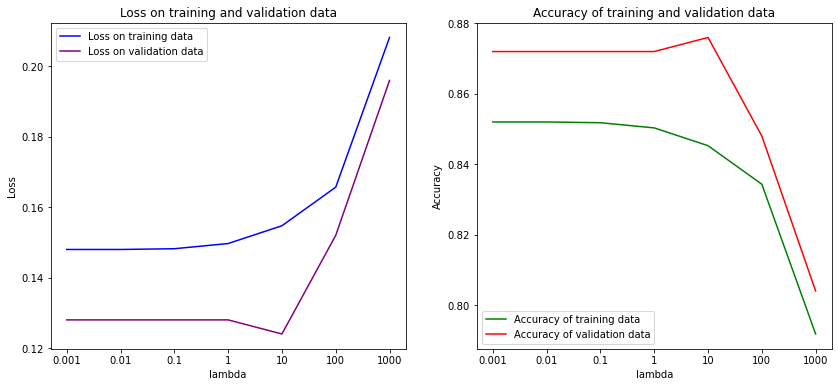

In [63]:
my_ticks = [i for i in range(len(lambda_))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_xticks(my_ticks)
ax1.set_xticklabels(lambda_)
ax1.plot(my_ticks, loss_train_lr, label = "Loss on training data", c="blue")

ax1.set_xticks(my_ticks)
ax1.set_xticklabels(lambda_)
ax1.plot(my_ticks, loss_valid_lr, label = "Loss on validation data", c="purple")
ax1.set(title="Loss on training and validation data", xlabel="lambda", ylabel="Loss")
ax1.legend()

ax2.set_xticks(my_ticks)
ax2.set_xticklabels(lambda_)
ax2.plot(my_ticks, accuracy_train_lr, label = "Accuracy of training data", c="green")

ax2.set_xticks(my_ticks)
ax2.set_xticklabels(lambda_)
ax2.plot(my_ticks, accuracy_valid_lr, label = "Accuracy of validation data", c="red")
ax2.set(title="Accuracy of training and validation data", xlabel="lambda", ylabel="Accuracy")
ax2.legend()

plt.show()


In [64]:
best_lambda_ = lambda_[np.argmin(loss_valid_lr)]

In [65]:
lr_best=LogisticRegression(random_state=0, max_iter=200, penalty='l2' , C = (1/best_lambda_))

lr_best=lr_best.fit(X_train, y_train)
score = lr_best.score(X_train,y_train)
print("Mean accuracy of Logistic Regression: ", (score))

pred_y_valid = lr_best.predict(X_valid)

print("Zero one loss on validation data: ", zero_one_loss(y_valid, pred_y_valid))
print("Confusion Matrix: ")
print(confusion_matrix(y_valid, pred_y_valid))

print("F1 score on validation data: ", f1_score(y_valid, pred_y_valid))

Mean accuracy of Logistic Regression:  0.8452631578947368
Zero one loss on validation data:  0.124
Confusion Matrix: 
[[170  13]
 [ 18  49]]
F1 score on validation data:  0.7596899224806203


## Random forest

In [66]:
# run a random classifier with some estimator value in order to create feature importance graph.
clf = RandomForestClassifier(n_estimators=30)
# Fit the model to our training data.
clf = clf.fit(X_train, y_train)
importance = clf.feature_importances_

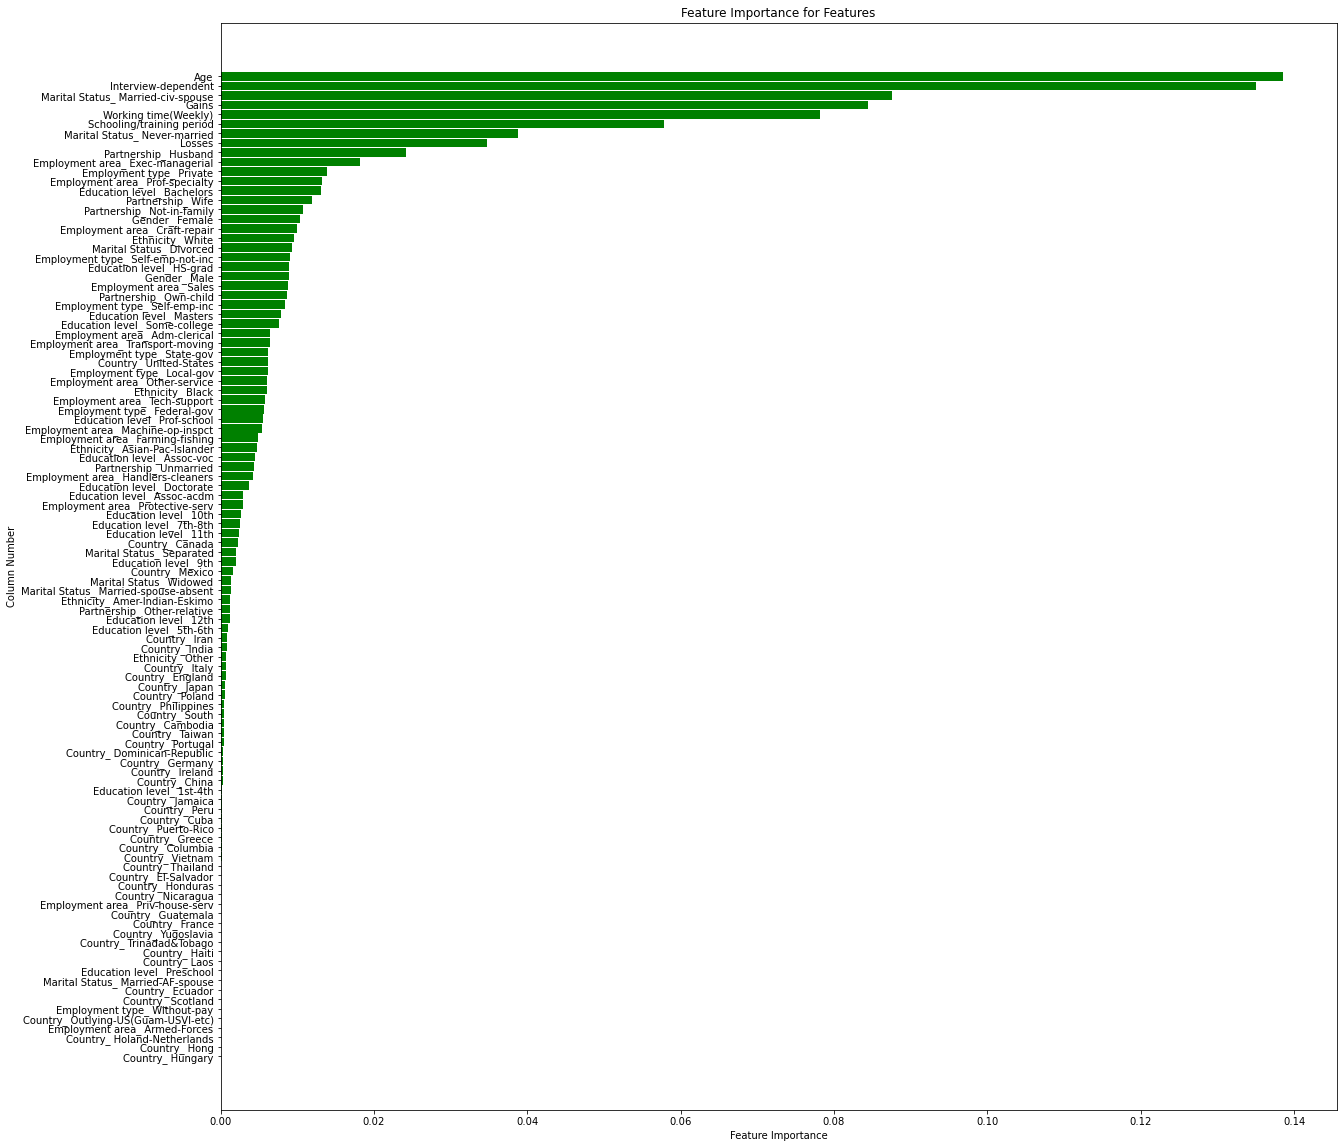

In [67]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
width=0.9
importance = clf.feature_importances_
index = np.argsort(importance)

plt.barh(range(len(importance)), importance[index], width, color='green', align='center')
plt.yticks(range(len(importance)), [X_train.columns[i] for i in index])

ax.set(title="Feature Importance for Features", xlabel="Feature Importance", ylabel = "Column Number")

plt.show()

In [68]:
# 1.
clf = RandomForestClassifier()
 
loss_train = []
accuracy_train = []

loss_valid = []
accuracy_valid = []

no_estimators = 100

for i in range(1, no_estimators+1):
    
    clf.set_params(n_estimators=i)
    clf.fit(X_train, y_train)
    
    # training data
    pred_y_train = clf.predict(X_train)
    loss_train.append(zero_one_loss(y_train, pred_y_train))
    accuracy_train.append(clf.score(X_train, y_train))
    
    # validation data
    pred_y_valid = clf.predict(X_valid)
    loss_valid.append(zero_one_loss(y_valid, pred_y_valid))
    accuracy_valid.append(clf.score(X_valid, y_valid))

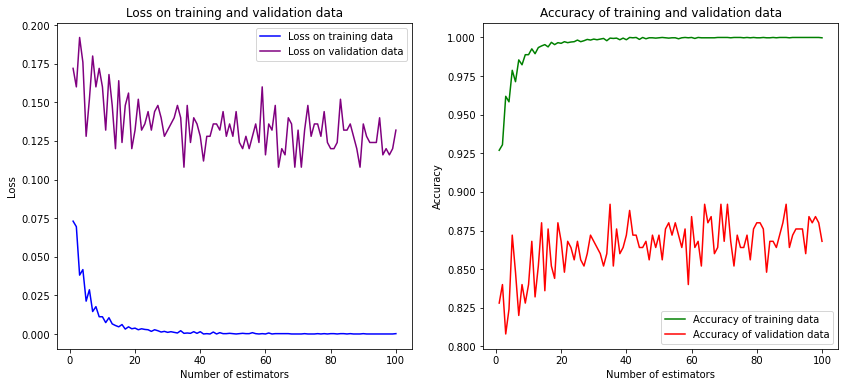

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(range(1, no_estimators+1), loss_train, label = "Loss on training data", c="blue")
ax1.plot(range(1, no_estimators+1), loss_valid, label = "Loss on validation data", c="purple")
ax1.set(title="Loss on training and validation data", xlabel="Number of estimators", ylabel="Loss")
ax1.legend()

ax2.plot(range(1, no_estimators+1), accuracy_train, label = "Accuracy of training data", c="green")
ax2.plot(range(1, no_estimators+1), accuracy_valid, label = "Accuracy of validation data", c="red")
ax2.set(title="Accuracy of training and validation data", xlabel="Number of estimators", ylabel="Accuracy")
ax2.legend()

plt.show()

In [70]:
# select the estimator with lowest validation loss.
estimator = np.argmin(loss_valid)
estimator

34

In [71]:
clf = RandomForestClassifier(n_estimators=estimator)
# Fit the model to our training data.
clf = clf.fit(X_train, y_train)
score = clf.score(X_train,y_train)
print("After training with the best possible paramter, the score is: ", score)

pred_y_train = clf.predict(X_train)
print("After training with the best possible parameter, the loss is: ", zero_one_loss(y_train, pred_y_train))


pred_y_valid = clf.predict(X_valid)
print("Zero one loss on validation data: ", zero_one_loss(y_valid, pred_y_valid))

print("Confusion matrix")
print(confusion_matrix(y_valid, pred_y_valid), '\n')

print("F1 score on validation data: ", f1_score(y_valid, pred_y_valid))

After training with the best possible paramter, the score is:  0.9978947368421053
After training with the best possible parameter, the loss is:  0.002105263157894721
Zero one loss on validation data:  0.132
Confusion matrix
[[171  12]
 [ 21  46]] 

F1 score on validation data:  0.736


## Decision tree

In [72]:
clf_tree = DecisionTreeClassifier(criterion='entropy')
 
loss_train_tree = []
accuracy_train_tree = []

loss_valid_tree = []
accuracy_valid_tree = []

no_depth = 100

for i in range(1, no_depth+1):
    
    clf_tree.set_params(max_depth=i)
    clf_tree.fit(X_train, y_train)
    
    # training data
    pred_y_train = clf_tree.predict(X_train)
    loss_train_tree.append(zero_one_loss(y_train, pred_y_train))
    accuracy_train_tree.append(clf_tree.score(X_train, y_train))
    
    # validation data
    pred_y_valid = clf_tree.predict(X_valid)
    loss_valid_tree.append(zero_one_loss(y_valid, pred_y_valid))
    accuracy_valid_tree.append(clf_tree.score(X_valid, y_valid))

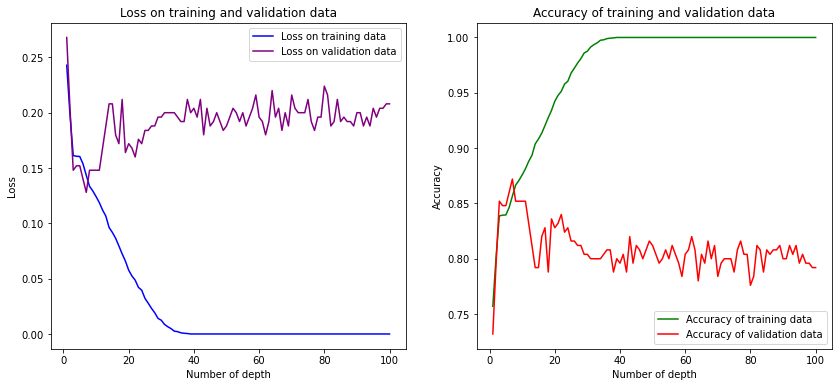

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(range(1, no_depth+1), loss_train_tree, label = "Loss on training data", c="blue")
ax1.plot(range(1, no_depth+1), loss_valid_tree, label = "Loss on validation data", c="purple")
ax1.set(title="Loss on training and validation data", xlabel="Number of depth", ylabel="Loss")
ax1.legend()


ax2.plot(range(1, no_depth+1), accuracy_train_tree, label = "Accuracy of training data", c="green")
ax2.plot(range(1, no_depth+1), accuracy_valid_tree, label = "Accuracy of validation data", c="red")
ax2.set(title="Accuracy of training and validation data", xlabel="Number of depth", ylabel="Accuracy")
ax2.legend()

plt.show()

In [74]:
# select the depth with lowest validation loss.
depth = np.argmin(loss_valid_tree)
depth

6

In [75]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
clf_tree.fit(X_train, y_train)
score = clf_tree.score(X_train,y_train)
print("After training with the best possible paramter, the score is: ", score)

pred_y_train = clf_tree.predict(X_train)
print("After training with the best possible parameter, the loss is: ", zero_one_loss(y_train, pred_y_train))

pred_y_valid = clf_tree.predict(X_valid)

print("Zero one loss on validation data: ", zero_one_loss(y_valid, pred_y_valid))

print(confusion_matrix(y_valid, pred_y_valid), '\n')
print("F1 score on validation data: ", f1_score(y_valid, pred_y_valid))

After training with the best possible paramter, the score is:  0.8463157894736842
After training with the best possible parameter, the loss is:  0.15368421052631576
Zero one loss on validation data:  0.14
[[170  13]
 [ 22  45]] 

F1 score on validation data:  0.7200000000000001


## Final model training

Since the highest F1 score was on Logistic Regression with lowest loss, therefore, we will train our final model on Logistic Regression.

In [79]:
classifier = LogisticRegression(random_state=0, max_iter=200, penalty='l2', C = (1/best_lambda_))

X = pd.concat([X_train, X_valid])
y = pd.concat([y_train, y_valid])
# Fit the model to our training data.
classifier = classifier.fit(X, y)
score = classifier.score(X, y)

print("Final accuracy on whole 5000 training samples: ", score)

Final accuracy on whole 5000 training samples:  0.8464


In [80]:
X_test_prediction = classifier.predict(X_test)

In [81]:
unique_elements, counts_elements = np.unique(X_test_prediction, return_counts=True)
unique_elements, counts_elements 

(array([0, 1], dtype=int8), array([20230,  4765], dtype=int64))